<a href="https://colab.research.google.com/github/MuayThaiLegz/TutoringLessons/blob/main/masteras3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 A : Calibration part A (/80pts)

---
Please edit the cell below to include your name and student ID #

**name:**

**SID:**

NOTE: In this assignment we will build on top of your **project** and **triangulate** functions from previous assignments.  If you weren't happy with your implementation from assignment 2, please consult with the TAs or your classmates to get things cleaned up before starting this assignment.


# 1. Parameterizing 3D Rotations

In order to optimize over the camera rotation during calibration, we need a way to parameterize the space of 3D rotations. There are many different ways to do this and each comes with different tradeoffs, but for our purposes we will adopt a simple approach of building a rotation by a sequence of rotations around the X, Y and Z axes (so called *Tait-Bryan angles*, see https://en.wikipedia.org/wiki/Euler_angles for more discussion)

## 1.1 Implement [15pts]

Write a function **makerotation** which takes as input three angles **rx,ry,rz** and returns a rotation matrix corresponding to rotating by **rx** degrees around the x-axis, followed by a rotation of **ry** degrees around the y-axis, followed by a rotation of **rz** degrees around the z-axis.

In [1]:
pip install visutils

ERROR: Could not find a version that satisfies the requirement visutils (from versions: none)
ERROR: No matching distribution found for visutils


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
# import visutils
%matplotlib inline

In [3]:
# def makerotation(rx,ry,rz):
#     """
#     Generate a rotation matrix

#     Parameters
#     ----------
#     rx,ry,rz : floats
#         Amount to rotate around x, y and z axes in degrees

#     Returns
#     -------
#     R : 2D numpy.array (dtype=float)
#         Rotation matrix of shape (3,3)
#     """

#     rx = np.pi*rx/180.0
#     ry = np.pi*ry/180.0
#     rz = np.pi*rz/180.0
#     Rx = #...
#     Ry = #...
#     Rz = #...
#     R = (Rz @ Ry @ Rx)
#     return R

In [4]:

import numpy as np

def makerotation(rx, ry, rz):
    """
    Generate a rotation matrix

    Parameters
    ----------
    rx, ry, rz : floats
        Amount to rotate around x, y, and z axes in degrees

    Returns
    -------
    R : 2D numpy.array (dtype=float)
        Rotation matrix of shape (3,3)
    """
    """
    These lines convert the rotation angles from degrees to radians.
    This is because trigonometric functions in Python use radians.
    """
    rx = np.pi * rx / 180.0
    ry = np.pi * ry / 180.0
    rz = np.pi * rz / 180.0

    # Rotation matrix around x-axis

    '''
    This defines the rotation matrix Rx for rotation about the x-axis.
    The matrix uses trigonometric functions to determine the rotation.

    '''
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(rx), -np.sin(rx)],
        [0, np.sin(rx), np.cos(rx)]
    ])

    # Rotation matrix around y-axis
    Ry = np.array([
        [np.cos(ry), 0, np.sin(ry)],
        [0, 1, 0],
        [-np.sin(ry), 0, np.cos(ry)]
    ])

    # Rotation matrix around z-axis
    Rz = np.array([
        [np.cos(rz), -np.sin(rz), 0],
        [np.sin(rz), np.cos(rz), 0],
        [0, 0, 1]
    ])

    # Combined rotation matrix

    """
    This multiplies the three rotation matrices together in the order of z, y, and x to produce a combined rotation matrix.
    The @ symbol in Python is used for matrix multiplication.

    """
    R = Rz @ Ry @ Rx

    return R


## 1.2 Testing [5pts]

Work out by hand what a 90 degree rotation should look like around each axis.  Then execute the test examples below and add some tests (asserts) to make sure your code passes.

Find a way to achieve the same rotation as **makerotation(90,90,0)** but without using rotation around the x-axis.  That is, determine some angles so that **makerotation(0,?,?) == makerotation(90,90,0)**


In [5]:
for ry in range(0, 360, 10):
    for rz in range(0, 360, 10):
        if (np.abs(makerotation(90, 90, 0) - makerotation(0, ry, rz)) < 1e-9).all():
            print(f"Found match for ry={ry}, rz={rz}")


Found match for ry=90, rz=270


In [6]:
#
# test your function on some simple examples
#
np.set_printoptions(precision=4,suppress=True)

print(makerotation(90,0,0))

print(makerotation(0,90,0))

print(makerotation(0,0,90))

print(makerotation(90,90,0))

ry = 90
rz = 270
print(makerotation(0,ry,rz))

# figure out what ry,rz values are needed in order to pass this test

'''
assert((makerotation(90,90,0)-makerotation(0,ry,rz)<1e-9).all()):

makerotation(90,90,0) and makerotation(0,ry,rz) generate two rotation matrices using the given angles.

(makerotation(90,90,0)-makerotation(0,ry,rz) calculates the difference between each element of the two matrices.

<1e-9 checks if each element of the resulting difference matrix is less than 1e-9 (which is 0.000000001).

.all() checks if all elements in the resulting matrix from the above condition are True. In other words, it checks if all differences are less than the threshold 1e-9.

assert is a debugging aid that tests a condition. If the condition is true, it does nothing and moves on to the next line of code. If the condition is false, it raises an error. In this case, if the matrices are not sufficiently close, an error is raised
'''

assert((makerotation(90,90,0)-makerotation(0,ry,rz)<1e-9).all())



[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0.  0.]]
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
[[ 0.  1.  0.]
 [ 0.  0. -1.]
 [-1.  0.  0.]]
[[-0.  1. -0.]
 [-0. -0. -1.]
 [-1.  0.  0.]]


In [7]:
'''
assert np.allclose(makerotation(90, 90, 0), makerotation(0, 90, 270), atol=1e-9):

np.allclose(makerotation(90, 90, 0), makerotation(0, 90, 270), atol=1e-9) is a NumPy function that checks if two arrays (here, matrices) are element-wise equal within a tolerance.
The atol parameter specifies the absolute tolerance. So, it checks if the absolute difference of each element of the two matrices is less than 1e-9.

assert again checks the condition. If the two matrices are not sufficiently close, an error is raised.

'''
assert((makerotation(90,90,0)-makerotation(0,ry,rz)<1e-9).all())

assert np.allclose(makerotation(90, 90, 0), makerotation(0, 90, 270), atol=1e-9)

# 2. Reprojection Error [20pts]

We will now specify a function which computes the reprojection error.  This is the function that we will later optimize when calibrating the camera extrinsic parameters. Take a look at the documentation for **scipy.optimize.leastsq**.  The optimizer expects that our function should take a vector of parameters and
return a vector of residuals which it will square and sum up to get the total error. For this reason, we will structure our code in the following way.

First, write a member function for the Camera class called **update_extrinsics** which takes a vector of 6 parameters (rx,ry,rz,tx,ty,tz). The function should keep the same intrinsic parameters (f,c) but update the extrinsic parameters (R,t) based on the entries in the parameter vector.  

Second, implement a function named **residuals** which computes the difference between a provided set of 2D point coordinates and the projection of 3D point coordinates by specified camera.  The residuals function takes as input the 3D points, the target 2D points, a camera with specified intrinsic parameters, and an extrinsic parameter vector. You should use **update_extrinsics** to update the extrinsic parameters, compute the projection of the 3D points with the updated camera and return a 1D vector containing the differences of all the x and y coordinates.


In [ ]:


class Camera:
    """
    A simple data structure describing camera parameters

    The parameters describing the camera
    cam.f : float   --- camera focal length (in units of pixels)
    cam.c : 2x1 vector  --- offset of principle point
    cam.R : 3x3 matrix --- camera rotation
    cam.t : 3x1 vector --- camera translation

    """

    def __init__(self,f,c,R,t):
        self.f = f
        self.c = c
        self.R = R
        self.t = t

    def __str__(self):
        return f'Camera : \n f={self.f} \n c={self.c.T} \n R={self.R} \n t = {self.t.T}'

    def project(self,pts3):
        """
        Project the given 3D points in world coordinates into the specified camera

        Parameters
        ----------
        pts3 : 2D numpy.array (dtype=float)
            Coordinates of N points stored in a array of shape (3,N)

        Returns
        -------
        pts2 : 2D numpy.array (dtype=float)
            Image coordinates of N points stored in an array of shape (2,N)

        """
        # get point location relative to camera
        pcam = self.R.transpose() @ (pts3 - self.t)
        #project
        p = self.f * (pcam / pcam[2,:])
        # offset principal point
        pts2 = p[0:2,:] + self.c
        return(pts2)


    def update_extrinsics(self,params):
        """
        Given a vector of extrinsic parameters, update the camera
        to use the provided parameters.

        Parameters
        ----------
        params : 1D numpy.array of shape (6,) (dtype=float)
            Camera parameters we are optimizing over stored in a vector
            params[:3] are the rotation angles, params[3:] are the translation

        """
        # Extract rotation angles and translation from the params vector
        rx, ry, rz = params[:3]
        tx, ty, tz = params[3:]

        # Convert rotation angles (in degrees) to rotation matrices
        # For simplicity, we'll use the earlier conversion method for each axis
        rx_rad = np.pi * rx / 180.0
        ry_rad = np.pi * ry / 180.0
        rz_rad = np.pi * rz / 180.0

        # Rotation matrix around x-axis
        Rx = np.array([
            [1, 0, 0],
            [0, np.cos(rx_rad), -np.sin(rx_rad)],
            [0, np.sin(rx_rad), np.cos(rx_rad)]
        ])

        # Rotation matrix around y-axis
        Ry = np.array([
            [np.cos(ry_rad), 0, np.sin(ry_rad)],
            [0, 1, 0],
            [-np.sin(ry_rad), 0, np.cos(ry_rad)]
        ])

        # Rotation matrix around z-axis
        Rz = np.array([
            [np.cos(rz_rad), -np.sin(rz_rad), 0],
            [np.sin(rz_rad), np.cos(rz_rad), 0],
            [0, 0, 1]
        ])

        # Update the camera's rotation matrix
        self.R = Rz @ Ry @ Rx

        # Update the camera's translation vector
        self.t = np.array([tx, ty, tz]).reshape(-1, 1)

In [8]:



class Camera:
    """
    A simple data structure describing camera parameters

    The parameters describing the camera
    cam.f : float   --- camera focal length (in units of pixels)
    cam.c : 2x1 vector  --- offset of principle point
    cam.R : 3x3 matrix --- camera rotation
    cam.t : 3x1 vector --- camera translation

    """

    def __init__(self,f,c,R,t):
        self.f = f
        self.c = c
        self.R = R
        self.t = t

    def __str__(self):
        return f'Camera : \n f={self.f} \n c={self.c.T} \n R={self.R} \n t = {self.t.T}'

    def project(self,pts3):
        """
        Project the given 3D points in world coordinates into the specified camera

        Parameters
        ----------
        pts3 : 2D numpy.array (dtype=float)
            Coordinates of N points stored in a array of shape (3,N)

        Returns
        -------
        pts2 : 2D numpy.array (dtype=float)
            Image coordinates of N points stored in an array of shape (2,N)

        """
        # get point location relative to camera
        pcam = self.R.transpose() @ (pts3 - self.t)
        #project
        p = self.f * (pcam / pcam[2,:])
        # offset principal point
        pts2 = p[0:2,:] + self.c
        return(pts2)


    def update_extrinsics(self,params):
        """
        Given a vector of extrinsic parameters, update the camera
        to use the provided parameters.

        Parameters
        ----------
        params : 1D numpy.array of shape (6,) (dtype=float)
            Camera parameters we are optimizing over stored in a vector
            params[:3] are the rotation angles, params[3:] are the translation

        """
                # Extract rotation angles and translation from the params vector
        rx, ry, rz = params[:3]
        tx, ty, tz = params[3:]

        # Convert rotation angles (in degrees) to rotation matrices
        # For simplicity, we'll use the earlier conversion method for each axis
        rx_rad = np.pi * rx / 180.0
        ry_rad = np.pi * ry / 180.0
        rz_rad = np.pi * rz / 180.0

        # Rotation matrix around x-axis
        Rx = np.array([
            [1, 0, 0],
            [0, np.cos(rx_rad), -np.sin(rx_rad)],
            [0, np.sin(rx_rad), np.cos(rx_rad)]
        ])

        # Rotation matrix around y-axis
        Ry = np.array([
            [np.cos(ry_rad), 0, np.sin(ry_rad)],
            [0, 1, 0],
            [-np.sin(ry_rad), 0, np.cos(ry_rad)]
        ])

        # Rotation matrix around z-axis
        Rz = np.array([
            [np.cos(rz_rad), -np.sin(rz_rad), 0],
            [np.sin(rz_rad), np.cos(rz_rad), 0],
            [0, 0, 1]
        ])

        # Update the camera's rotation matrix
        self.R = Rz @ Ry @ Rx

        # Update the camera's translation vector
        self.t = np.array([tx, ty, tz]).reshape(-1, 1)


In [9]:
def residuals(pts3,pts2,cam,params):
    """
    Compute the difference between the projection of 3D points by the camera
    with the given parameters and the observed 2D locations

    Parameters
    ----------
    pts3 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (3,N)

    pts2 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (2,N)

    params : 1D numpy.array (dtype=float)
        Camera parameters we are optimizing stored in a vector of shape (6,)

    Returns
    -------
    residual : 1D numpy.array (dtype=float)
        Vector of residual 2D projection errors of size 2*N

    """
    #... make sure to flatten into  vector before returning, so it works with scipy.optimize.leastsq

In [10]:
def residuals(pts3, pts2, cam, params):
    """
    Compute the difference between the projection of 3D points by the camera
    with the given parameters and the observed 2D locations

    Parameters
    ----------
    pts3 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (3,N)

    pts2 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (2,N)

    params : 1D numpy.array (dtype=float)
        Camera parameters we are optimizing stored in a vector of shape (6,)

    Returns
    -------
    residual : 1D numpy.array (dtype=float)
        Vector of residual 2D projection errors of size 2*N

    """
    # Update camera's extrinsic parameters with given params
    cam.update_extrinsics(params)

    # Project the 3D points using the updated camera parameters
    projected_pts2 = cam.project(pts3)

    # Calculate the difference (residual) between projected and observed 2D points
    diff = projected_pts2 - pts2

    # Flatten the residual errors into a 1D array and return
    return diff.flatten()


Camera : 
 f=200 
 c=[[50 50]] 
 R=[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
 t = [[ 0.5  0.5 -2.5]]
Camera : 
 f=200 
 c=[[50 50]] 
 R=[[ 0.9962 -0.0872  0.    ]
 [ 0.0872  0.9962  0.    ]
 [ 0.      0.      1.    ]] 
 t = [[ 0.5  0.5 -3. ]]
[[0 0 0 0 1 1 1 1]
 [0 0 1 1 1 0 0 1]
 [0 1 1 0 0 0 1 1]]


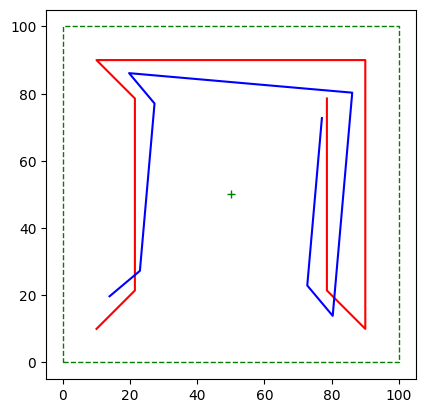


 residuals of camB relative to camA
[ 3.8883  1.4877  5.8455  9.6987 -3.8883 -9.6987 -5.8455 -1.4877  9.6987
  5.8455 -1.4877 -3.8883 -9.6987  3.8883  1.4877 -5.8455]
[[-3.8883 -1.4877 -5.8455 -9.6987  3.8883  9.6987  5.8455  1.4877]
 [-9.6987 -5.8455  1.4877  3.8883  9.6987 -3.8883 -1.4877  5.8455]]

 residuals of camA relative to camB
[-3.8883 -1.4877 -5.8455 -9.6987  3.8883  9.6987  5.8455  1.4877 -9.6987
 -5.8455  1.4877  3.8883  9.6987 -3.8883 -1.4877  5.8455]
[[ 3.8883  1.4877  5.8455  9.6987 -3.8883 -9.6987 -5.8455 -1.4877]
 [ 9.6987  5.8455 -1.4877 -3.8883 -9.6987  3.8883  1.4877 -5.8455]]


In [11]:
#
# Test the residual function to make sure it is doing the right thing.
#

# create two cameras with same intrinsic but slightly different extrinsic parameters

'''
Two cameras are created, camA and camB, with the same intrinsic parameters (focal length and principal point offset) but will have different extrinsic parameters:

'''
c = [50,50]
camA = Camera(f=200,c=np.array([c]).T,t=np.array([[0,0,0]]).T, R=makerotation(0,0,0))
camB = Camera(f=200,c=np.array([c]).T,t=np.array([[0,0,0]]).T, R=makerotation(0,0,0))


'''
 Setting extrinsic parameters for each camera. For camA, it will be translated slightly, while for camB, it will be rotated around the z-axis by 5 degrees and translated a bit more
'''
paramsA = np.array([0,0,0,0.5,0.5,-2.5])
paramsB = np.array([0,0,5,0.5,0.5,-3])
camA.update_extrinsics(paramsA)
camB.update_extrinsics(paramsB)

print(camA)
print(camB)

# create a test object (corners of a 3D cube)
pts3 = np.array([[0,0,0],[0,0,1],[0,1,1],[0,1,0],[1,1,0],[1,0,0],[1,0,1],[1,1,1]]).T
print(pts3)
# visualize the two projections
pts2A = camA.project(pts3)
pts2B = camB.project(pts3)

plt.plot(pts2A[0,:],pts2A[1,:],'r')
plt.plot(pts2B[0,:],pts2B[1,:],'b')
#visualize the sensor frame assuming our sensor is centered around the principal point
plt.gca().add_patch(patches.Rectangle((0,0),2*c[0],2*c[1],color='g',fill=False,ls='--'))
plt.plot(c[0],c[1],'g+')
plt.axis('square')
plt.show()

# double check that the residuals are the same as the difference in the reprojected coordinates
print("\n residuals of camB relative to camA")
print(residuals(pts3,pts2A,camB,paramsB))
print(pts2A-pts2B)

print("\n residuals of camA relative to camB")
print(residuals(pts3,pts2B,camA,paramsA))
print(pts2B-pts2A)


# 3. Camera Pose Estimation

We are now ready to estimate camera pose using optimize.  Implement a function **calibratePose** which takes as input the 3D coordinates of a calibration object, the observed 2D coordinates in the image, and an initial guess of the camera. Your function should use **scipy.optimize.leastsq** to optimize the extrinsic parameters in order to minimize the reprojection error. Since the **residuals** function takes additional arguments and **leastsq** expects a function which only takes the parameter vector as input, you should use Python's **lambda** function to wrap **residuals**, subistituting in the parameters that are fixed during the optimization. Once you have determined the optimum parameters, update the extrinsic parameters to the optimum and return the resulting camera.


## 3.1 Implementation [30pts]

In [12]:

def calibratePose(pts3,pts2,cam_init,params_init):

    """
    Calibrate the provided camera by updating R,t so that pts3 projects
    as close as possible to pts2

    Parameters
    ----------
    pts3 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (3,N)

    pts2 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (2,N)

    cam : Camera
        Initial estimate of camera

    params_init : 1D numpy.array (dtype=float)
        Initial estimate of camera extrinsic parameters ()
        params[0:3] are the rotation angles, params[3:6] are the translation

    Returns
    -------
    cam : Camera
        Refined estimate of camera with updated R,t parameters

    """

    # use scipy.optimize.leastsq to optimize for params and return the new camera ...


In [13]:
from scipy.optimize import leastsq

def calibratePose(pts3, pts2, cam_init, params_init):
    """
    Calibrate the provided camera by updating R,t so that pts3 projects
    as close as possible to pts2

    Parameters
    ----------
    pts3 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (3,N)

    pts2 : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (2,N)

    cam_init : Camera
        Initial estimate of camera

    params_init : 1D numpy.array (dtype=float)
        Initial estimate of camera extrinsic parameters ()
        params[0:3] are the rotation angles, params[3:6] are the translation

    Returns
    -------
    cam : Camera
        Refined estimate of camera with updated R,t parameters

    """

    # Define the residuals function for optimization
    # Note: We use a lambda function to wrap around the residuals function
    # and feed it with the constant arguments
    fun = lambda params: residuals(pts3, pts2, cam_init, params)

    # Optimize using least squares
    params_opt, _ = leastsq(fun, params_init)

    # Update the camera parameters with the optimized values
    cam_init.update_extrinsics(params_opt)

    return cam_init


# 3.2 Synthetic Test Example and Failure Cases [10pts]

Use the code below to check that your calibrate function works. Add some code to also visualize the point locations in 3D and the location and orientation of the camera (i.e., using the 3D plotting functions from Assignment 2)

Once you are confident that your calibration function is behaving correctly, you should experiment with changing the initial parameters.  Find a set of initial parameters which yields a ***wrong*** solution (i.e. where the Final Camera is not similar to the True Camera).  In the text box below indicate what bad initialization you used and the resulting set of camera parameters after the optimization. Give a brief explanation of where this bad camera is located and what direction it is oriented in.   

In [14]:
# 3.2 Synthetic Test Example and Failure Cases [10pts]


# 3D calibration object
pts3 = np.array([[0,0,0],[0,0,1],[0,1,1],[0,1,0],[1,1,0],[1,0,0],[1,0,1],[1,1,1]]).T

# true camera
c = [50,50]
cam_true = Camera(f=50,c=np.array([c]).T,t=np.array([[-0.25,-0.25,-2]]).T, R=makerotation(10,0,0))

print("\n True Camera")
print(cam_true)



 True Camera
Camera : 
 f=50 
 c=[[50 50]] 
 R=[[ 1.      0.      0.    ]
 [ 0.      0.9848 -0.1736]
 [ 0.      0.1736  0.9848]] 
 t = [[-0.25 -0.25 -2.  ]]


In [15]:

# image of calibration object with some simulated noise in the 2D locations
pts2 = cam_true.project(pts3)
noiselevel = 0.5
pts2 = pts2 + noiselevel*np.random.randn(pts2.shape[0],pts2.shape[1])

# initial guess of camera params
cam = Camera(f=50,c=np.array([[50,50]]).T,t=np.array([[0,0,0]]).T, R=makerotation(0,0,0))
params_init = np.array([0,0,0,0,0,-2])
cam.update_extrinsics(params_init)

print("\n Initial Camera")
print(cam)



 Initial Camera
Camera : 
 f=50 
 c=[[50 50]] 
 R=[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
 t = [[ 0  0 -2]]


In [16]:

pts2init = cam.project(pts3)

print(pts2init)
# now run calibration
cam = calibratePose(pts3,pts2,cam,params_init)

print("\n Final Camera")
pts2final = cam.project(pts3)
print(pts2final)

[[50.     50.     50.     50.     75.     75.     66.6667 66.6667]
 [50.     50.     66.6667 75.     75.     50.     50.     66.6667]]

 Final Camera
[[56.1826 53.8431 54.1935 56.9792 85.3939 81.8977 70.9259 72.4271]
 [65.3754 63.358  82.309  95.2401 94.7884 65.2007 63.2525 82.0912]]


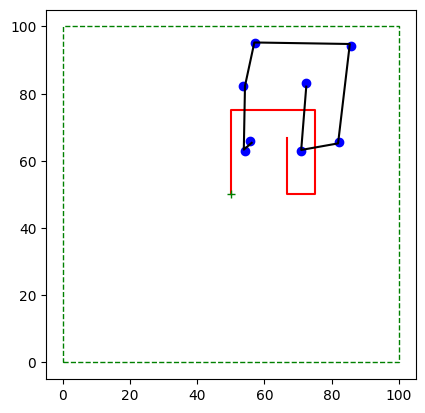

In [17]:
# 3.2 Synthetic Test Example and Failure Cases [10pts]


#
# Plot the true, initial and final reprojections
# The final reprojection should be on top of the true image
#
plt.plot(pts2[0,:],pts2[1,:],'bo')
plt.plot(pts2init[0,:],pts2init[1,:],'r')
plt.plot(pts2final[0,:],pts2final[1,:],'k')
plt.gca().add_patch(patches.Rectangle((0,0),2*c[0],2*c[1],color='g',fill=False,ls='--'))
plt.plot(c[0],c[1],'g+')
plt.axis('square')
plt.show()

#
# Add some additional visualiztion here to show the points in 3D and the locations and orientations
# of cam_true and cam.  You can either use a 3D plot or show multiple 2D plots (e.g. overhead
# and side views).  Play with this! Maybe try the visualization tools in Open3D if you want even more fun!
#


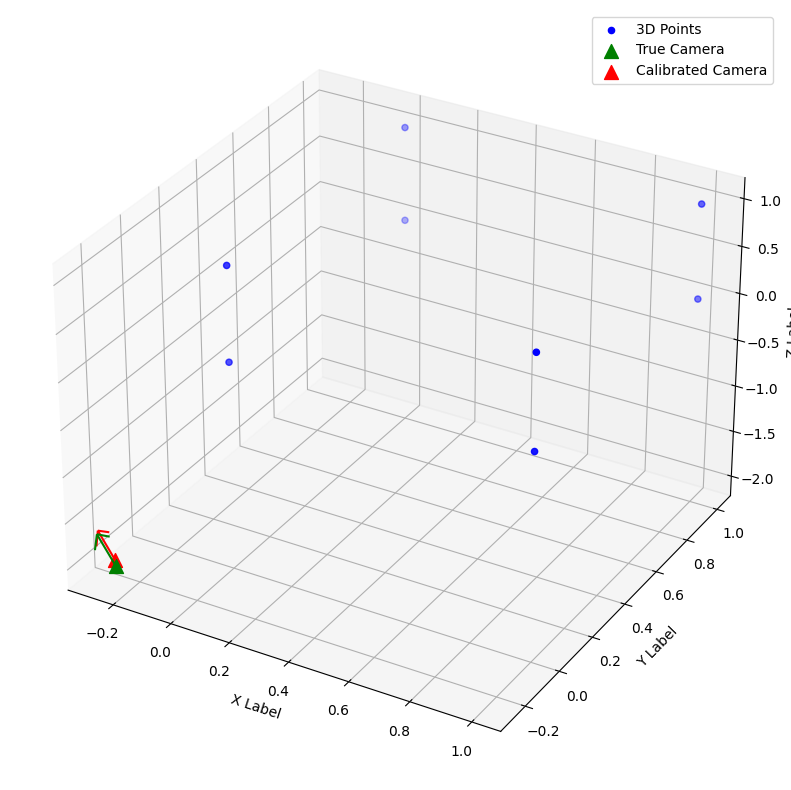

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D calibration object points
ax.scatter(pts3[0, :], pts3[1, :], pts3[2, :], c='b', marker='o', label='3D Points')

# Function to plot camera location and orientation
def plot_camera(ax, cam, color, label):
    t = cam.t.flatten()
    ax.scatter(t[0], t[1], t[2], c=color, marker='^', s=100, label=label)
    # For orientation, we'll use the camera's forward direction (third column of R matrix)
    look_dir = cam.R[:, 2].flatten()
    ax.quiver(t[0], t[1], t[2], look_dir[0], look_dir[1], look_dir[2], length=0.5, color=color)

# Plot true and calibrated camera positions and orientations
plot_camera(ax, cam_true, 'g', 'True Camera')
plot_camera(ax, cam, 'r', 'Calibrated Camera')

# Setting the axes labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()

# Display the 3D plot
plt.show()



 True Camera
Camera : 
 f=50 
 c=[[50 50]] 
 R=[[ 1.      0.      0.    ]
 [ 0.      0.9848 -0.1736]
 [ 0.      0.1736  0.9848]] 
 t = [[-0.25 -0.25 -2.  ]]

 Initial Camera
Camera : 
 f=50 
 c=[[50 50]] 
 R=[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
 t = [[ 1  0 -2]]

 Final Camera
Camera : 
 f=50 
 c=[[50 50]] 
 R=[[ 1.      0.     -0.    ]
 [-0.      0.9848 -0.1736]
 [ 0.      0.1736  0.9848]] 
 t = [[-0.25 -0.25 -2.  ]]


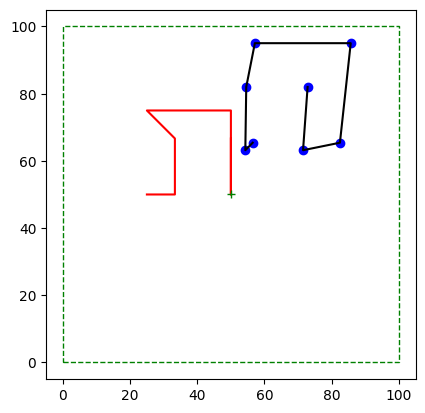

In [19]:
#
# Now repeat the calibration but with a setting for params_init that results
# in the optimization finding a poor solution (a bad local minima)
#

#
# Visualize the resulting bad solution.
#
# 3D calibration object
pts3 = np.array([[0,0,0],[0,0,1],[0,1,1],[0,1,0],[1,1,0],[1,0,0],[1,0,1],[1,1,1]]).T

# true camera
c = [50,50]
cam_true = Camera(f=50,c=np.array([c]).T,t=np.array([[-0.25,-0.25,-2]]).T, R=makerotation(10,0,0))

print("\n True Camera")
print(cam_true)

# image of calibration object with some simulated noise in the 2D locations
pts2 = cam_true.project(pts3)
noiselevel = 0
pts2 = pts2 + noiselevel*np.random.randn(pts2.shape[0],pts2.shape[1])

# initial guess of camera params
cam = Camera(f=50,c=np.array([[50,50]]).T,t=np.array([[0,0,0]]).T, R=makerotation(0,0,0))
params_init = np.array([0,0,0,1,0,-2])
cam.update_extrinsics(params_init)

print("\n Initial Camera")
print(cam)
pts2init = cam.project(pts3)

# now run calibration
cam = calibratePose(pts3,pts2,cam,params_init)

print("\n Final Camera")
print(cam)
pts2final = cam.project(pts3)

#
# Plot the true, initial and final reprojections
# The final reprojection should be on top of the true image
#
plt.plot(pts2[0,:],pts2[1,:],'bo')
plt.plot(pts2init[0,:],pts2init[1,:],'r')
plt.plot(pts2final[0,:],pts2final[1,:],'k')
plt.gca().add_patch(patches.Rectangle((0,0),2*c[0],2*c[1],color='g',fill=False,ls='--'))
plt.plot(c[0],c[1],'g+')
plt.axis('square')
plt.show()

#
# Add some additional visualiztion here to show the points in 3D and the locations and orientations
# of cam_true and cam.  You can either use a 3D plot or show multiple 2D plots (e.g. overhead
# and side views).  Play with this! Maybe try the visualization tools in Open3D if you want even more fun!
#

# .....

## Explain one of the failures including where the initial camera was that led to failure.

### ...